In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import matplotlib.path as mpath
import momlevel as ml

# parameters for setting circular cutoff for Southern Ocean plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [2]:
datasets_historical = ["odiv-231", "odiv-232"]

ds_231 = xr.open_zarr("/work/Katherine.Turner/CM4X-model-output/odiv-231/monthly_winds_zarr", use_cftime=True)
ds_232 = xr.open_zarr("/work/Katherine.Turner/CM4X-model-output/odiv-232/monthly_winds_zarr", use_cftime=True)

In [3]:
u10_231 = ds_231.u_ref.sel(time=slice('1981-01-01','2010-12-31'), lat=slice(-90,0))
u10_232 = ds_232.u_ref.sel(lat=slice(-90,0))

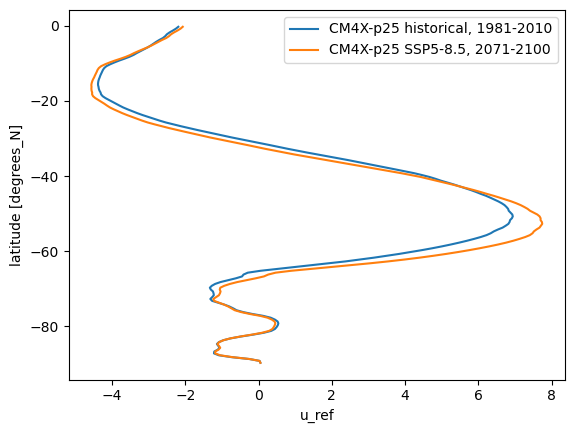

In [29]:
u10_231.mean(dim={"time", "lon"}).plot(y='lat', label="CM4X-p25 historical, 1981-2010")
u10_232.sel(time=slice('2071-01-01','2100-12-31')).mean(dim={"lon", "time"}).plot(y="lat", label="CM4X-p25 SSP5-8.5, 2071-2100")
plt.legend()

plt.savefig("/home/Katherine.Turner/CM4p25_proj_zonalwesterlies.png", format="png", dpi=100)

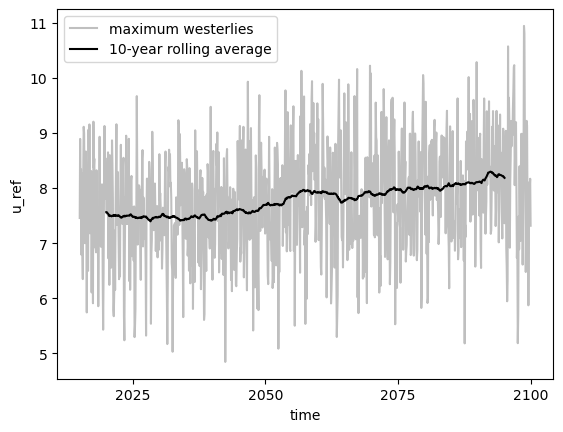

In [28]:
u10_232.mean("lon").max("lat").plot(color="grey", label="maximum westerlies", alpha=0.5)
u10_232.mean("lon").max("lat").rolling(time=120,center=True).mean().plot(color='k', label="10-year rolling average")

plt.legend()
plt.savefig("/home/Katherine.Turner/CM4p25_westerlymax.png", format="png", dpi=100)

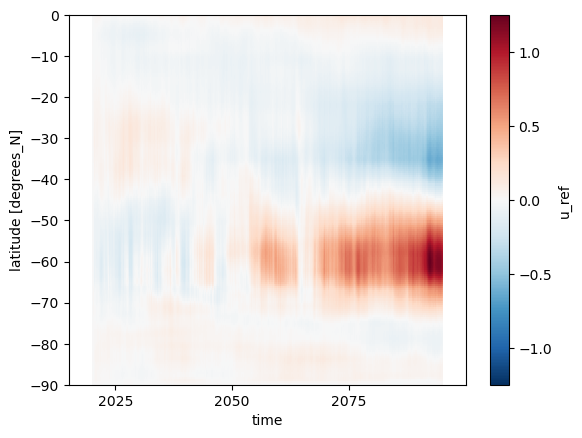

In [23]:
(u10_232.mean("lon").rolling(time=120, center=True).mean() - u10_232[:120,:,:].mean({"lon","time"})).plot(y="lat")

In [14]:
max_westerlies = u10_232.mean("lon").max("lat")

max_westerlies

<xarray.DataArray 'u_ref' (time: 1020)>
dask.array<_nanmax_skip-aggregate, shape=(1020,), dtype=float32, chunksize=(1020,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2099-12-16 12:00:00

In [16]:
lat_max = u10_232.lat.where(u10_232.mean("lon") == max_westerlies)

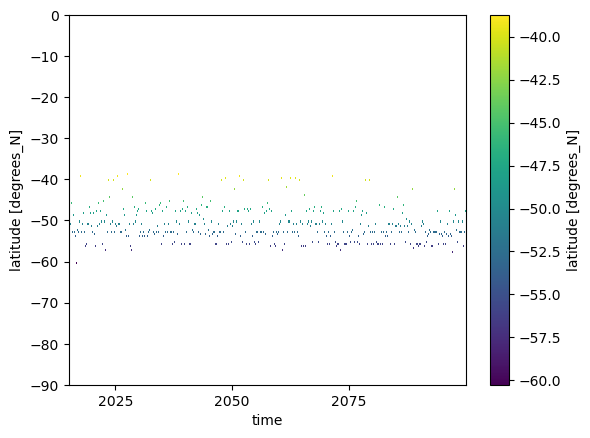

In [18]:
lat_max.plot()